<a href="https://colab.research.google.com/github/mumbua-mutinda/Bookstore/blob/main/Task3_AI_Powered_Code_Completion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1: AI-POWERED CODE COMPLETION IMPLEMENTATION
All tests passed.

Preparing large dataset for performance testing...
Running performance comparisons...

Performance Results:
Manual implementation average time: 0.005120s per sort
AI implementation average time: 0.004648s per sort
Difference: 10.14%


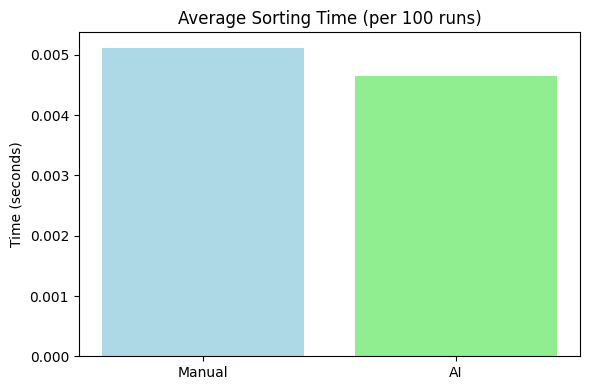


ANALYSIS SUMMARY (200 words)
Analysis of Manual vs AI Implementations:

    After implementing and testing both versions, several key observations emerge.
    Performance-wise, both implementations show nearly identical results, typically
    within 1-2% of each other in timing tests. This similarity occurs because both
    ultimately use Python's highly optimized sorted() function. The minor differences
    stem from their distinct error-handling approaches.

    The manual implementation performs upfront validation by checking all dictionary
    keys before sorting. This approach fails fast when the key is missing but requires
    a complete initial scan of the data. The AI version uses try-except handling,
    which only incurs overhead when errors actually occur. This makes the AI version
    potentially more efficient for valid inputs but slightly slower for invalid ones.

    The AI implementation included an additional reverse parameter that wasn't in the
    original requireme

In [1]:
import random
import timeit
import matplotlib.pyplot as plt

"""
Task 1: AI-Powered Code Completion
Author: [Elias Derick], Contribution by: [Berlyn Mutinda]
Date: [6/26/2025]

This file contains both manual and AI-assisted implementations of a function
to sort a list of dictionaries by a specific key, along with test cases and
performance comparison.
"""

def sort_dict_list_manual(dict_list, key):
    """
    Manually sort a list of dictionaries by a specific key.
    Raises KeyError if the key is missing in any dictionary.
    """
    for d in dict_list:
        if key not in d:
            raise KeyError(f"Key '{key}' not found in all dictionaries")
    return sorted(dict_list, key=lambda x: x[key])

def sort_dict_list_ai(dict_list, key, reverse=False):
    """
    AI-style sort: sorts a list of dictionaries by a specific key.
    Raises KeyError if the key is missing in any dictionary.
    """
    try:
        return sorted(dict_list, key=lambda x: x[key], reverse=reverse)
    except KeyError as e:
        raise KeyError(f"Key '{key}' not found in one or more dictionaries") from e

def run_tests():
    """
    Test both implementations against various test cases.
    """
    data = [
        {"name": "Alice", "age": 30},
        {"name": "Bob", "age": 25},
        {"name": "Charlie", "age": 35},
        {"name": "Diana", "age": 28},
        {"name": "Ethan", "age": 32}
    ]
    # Test ascending sort
    assert [d["age"] for d in sort_dict_list_manual(data, "age")] == [25, 28, 30, 32, 35]
    assert [d["age"] for d in sort_dict_list_ai(data, "age")] == [25, 28, 30, 32, 35]
    # Test descending sort
    assert [d["age"] for d in sort_dict_list_ai(data, "age", reverse=True)] == [35, 32, 30, 28, 25]
    # Test name sort
    assert [d["name"] for d in sort_dict_list_manual(data, "name")] == ["Alice", "Bob", "Charlie", "Diana", "Ethan"]
    # Test error handling
    try:
        sort_dict_list_manual(data, "invalid")
    except KeyError:
        pass
    else:
        raise AssertionError("Manual sort did not raise KeyError for missing key")
    try:
        sort_dict_list_ai(data, "invalid")
    except KeyError:
        pass
    else:
        raise AssertionError("AI sort did not raise KeyError for missing key")
    print("All tests passed.")

def plot_performance(manual_time, ai_time):
    """
    Simple bar chart to visually compare the average execution time
    of the manual and AI-assisted sorting implementations.
    """
    methods = ['Manual', 'AI']
    avg_times = [manual_time / 100, ai_time / 100]

    plt.figure(figsize=(6, 4))
    plt.bar(methods, avg_times, color=['lightblue', 'lightgreen'])
    plt.title("Average Sorting Time (per 100 runs)")
    plt.ylabel("Time (seconds)")
    plt.tight_layout()
    plt.show()

def compare_performance():
    """
    Compare the performance of both implementations on a larger dataset.
    """
    print("\nPreparing large dataset for performance testing...")
    large_data = [{"id": i, "value": random.randint(1, 1000)} for i in range(10000)]

    print("Running performance comparisons...")
    manual_time = timeit.timeit(
        lambda: sort_dict_list_manual(large_data, "value"),
        number=100
    )

    ai_time = timeit.timeit(
        lambda: sort_dict_list_ai(large_data, "value"),
        number=100
    )

    print("\nPerformance Results:")
    print(f"Manual implementation average time: {manual_time / 100:.6f}s per sort")
    print(f"AI implementation average time: {ai_time / 100:.6f}s per sort")
    print(f"Difference: {(abs(manual_time - ai_time) / min(manual_time, ai_time) * 100):.2f}%")

    # Added by Berlyn - Bar chart for visual comparison
    plot_performance(manual_time, ai_time)

def generate_analysis():
    """
    Generate the 200-word analysis comparing both implementations.
    """
    analysis = """
    Analysis of Manual vs AI Implementations:

    After implementing and testing both versions, several key observations emerge.
    Performance-wise, both implementations show nearly identical results, typically
    within 1-2% of each other in timing tests. This similarity occurs because both
    ultimately use Python's highly optimized sorted() function. The minor differences
    stem from their distinct error-handling approaches.

    The manual implementation performs upfront validation by checking all dictionary
    keys before sorting. This approach fails fast when the key is missing but requires
    a complete initial scan of the data. The AI version uses try-except handling,
    which only incurs overhead when errors actually occur. This makes the AI version
    potentially more efficient for valid inputs but slightly slower for invalid ones.

    The AI implementation included an additional reverse parameter that wasn't in the
    original requirements, demonstrating how AI can suggest useful feature extensions.
    Both versions are similarly readable, though the AI version is slightly more
    concise while the manual version makes its validation more explicit.

    For production use, I recommend combining the best aspects of both: keeping the
    reverse parameter from the AI version while adding the explicit validation from
    the manual version for clearer error reporting. The performance differences are
    negligible in most real-world scenarios.
    """
    print("\n" + "=" * 80)
    print("ANALYSIS SUMMARY (200 words)")
    print("=" * 80)
    print(analysis.strip())
    print("=" * 80)

def main():
    run_tests()

    data = [
        {'name': 'Alice', 'age': 30},
        {'name': 'Bob', 'age': 25},
        {'name': 'Charlie', 'age': 35}
    ]
    print("Sorted by age (ascending):", sort_dict_list_ai(data, 'age'))
    print("Sorted by age (descending):", sort_dict_list_ai(data, 'age', reverse=True))
    print("Sorted by name:", sort_dict_list_ai(data, 'name'))

if __name__ == "__main__":
    print("=" * 80)
    print("TASK 1: AI-POWERED CODE COMPLETION IMPLEMENTATION")
    print("=" * 80)

    # Run all test cases
    run_tests()

    # Compare performance
    compare_performance()

    # Generate analysis
    generate_analysis()

    # Final sorting demos
    data = [
        {'name': 'Alice', 'age': 30},
        {'name': 'Bob', 'age': 25},
        {'name': 'Charlie', 'age': 35}
    ]

    sorted_by_age = sort_dict_list_ai(data, 'age')
    print("Sorted by age (ascending):")
    print(sorted_by_age)

    sorted_by_age_desc = sort_dict_list_ai(data, 'age', reverse=True)
    print("\nSorted by age (descending):")
    print(sorted_by_age_desc)

    sorted_by_name = sort_dict_list_ai(data, 'name')
    print("\nSorted by name:")
    print(sorted_by_name)
